In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


In [4]:
digits = load_digits()

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
len(digits.feature_names)

64

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
images_and_labels = list(zip(digits.images, digits.target))

In [10]:
images_and_labels

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
  0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
  1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0., 

Text(0.5, 1.0, 'Etiqueta: 0')

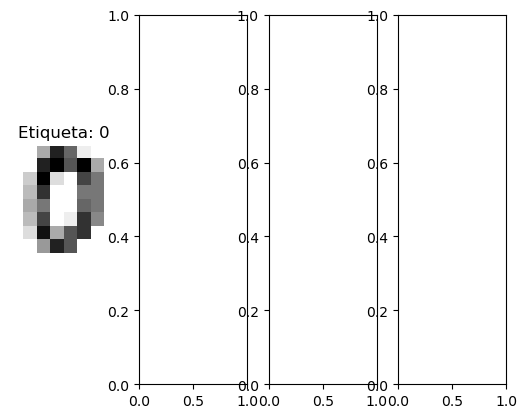

In [11]:
fig, axes = plt.subplots(1, 4)
axes[0].set_axis_off()
axes[0].imshow(images_and_labels[0][0], cmap = plt.cm.gray_r)
axes[0].set_title("Etiqueta: %i" % images_and_labels[0][1])

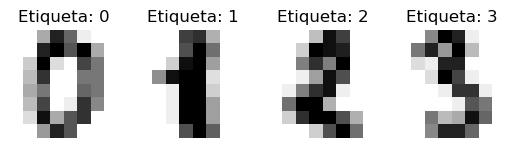

In [12]:
fig, axes = plt.subplots(1, 4)
for ax, (image, label) in zip(axes, images_and_labels[0:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title("Etiqueta: %i" % label)

In [13]:
classifier = SVC(gamma = 0.001)

In [14]:
digits.images.shape

(1797, 8, 8)

In [15]:
n_samples = digits.images.shape[0]
n_samples

1797

In [16]:
data_reshape = digits.images.reshape(n_samples, -1)
data_reshape.shape

(1797, 64)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_reshape, digits.target, test_size=0.5, shuffle= False)

In [18]:
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [19]:
predictions = classifier.predict(X_test)

In [20]:
X_test_reshaped = X_test.reshape(len(X_test), digits.images.shape[1], digits.images.shape[2])
X_test_reshaped.shape

(899, 8, 8)

In [21]:
images_and_predictions = list(zip(X_test_reshaped, predictions))

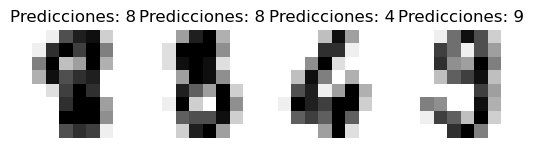

In [22]:
fig, axes = plt.subplots(1, 4)
for ax, (image, prediction) in zip(axes, images_and_predictions[0:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title("Predicciones: %i" % prediction)

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



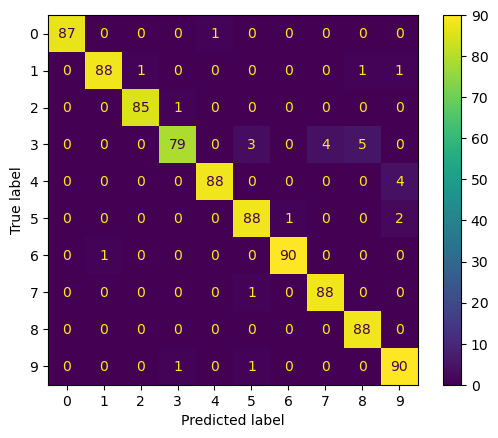

In [25]:
cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

plt.show()